In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd
%matplotlib inline
import os
from statsmodels.tsa.api import ExponentialSmoothing ,  SimpleExpSmoothing

In [30]:
stock = pd.read_csv(r"C:\Users\RITIK\Downloads\NIFTY 50-22-03-2023-to-22-03-2024.csv")
stock.columns = stock.columns.str.strip()
stock["Price"] = stock[["Open" , "Close"]].mean(axis=1)
stock["Return"] = stock["Open"] - stock["Close"]


In [23]:
stock.isna().any()

Date               False
Open               False
High               False
Low                False
Close              False
Shares Traded       True
Turnover (₹ Cr)     True
Price              False
Return             False
dtype: bool

In [29]:
stocks = stock.loc[: , ["Date" , "Price" , "Return"]]
stocks["Date"] = pd.to_datetime(stocks["Date"] , infer_datetime_format = True)
stocks = stocks.set_index(["Date"])
stocks

C:\Users\RITIK\AppData\Local\Temp\ipykernel_4756\4001431960.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  stocks["Date"] = pd.to_datetime(stocks["Date"] , infer_datetime_format = True)
C:\Users\RITIK\AppData\Local\Temp\ipykernel_4756\4001431960.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  stocks["Date"] = pd.to_datetime(stocks["Date"] , infer_datetime_format = True)


,Price,Return
Date,,
2023-03-22,17164.675,25.55
2023-03-23,17087.150,20.50
2023-03-24,17010.625,131.15
2023-03-27,16985.000,-1.40
2023-03-28,16991.725,80.05
...,...,...
2024-03-18,22022.900,-65.60
2024-03-19,21881.950,129.00
2024-03-20,21841.500,4.80


[]

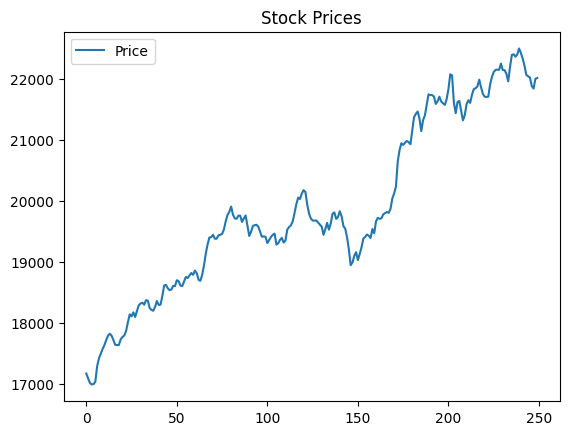

In [35]:
#plotting stock price trend
ax1 = stock["Price"].plot()
plt.title("Stock Prices")
ax1.legend()
plt.plot()

[]

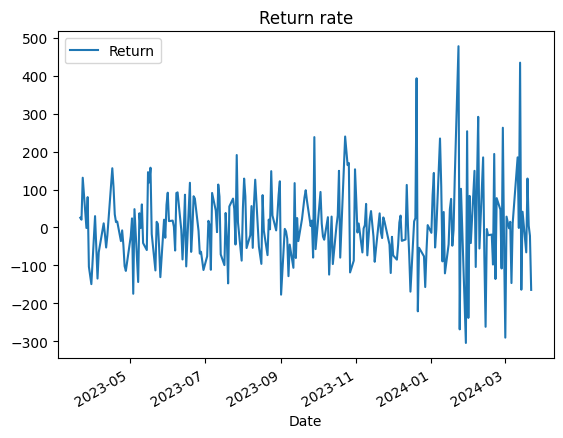

In [34]:
ax2 = stocks["Return"].plot()
plt.title("Return rate")
ax2.legend()
plt.plot()

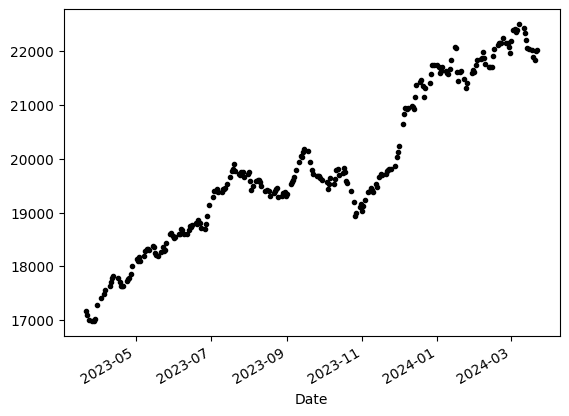

In [37]:
#dotted plot
stocks["Price"].plot(style="k.")
plt.show()

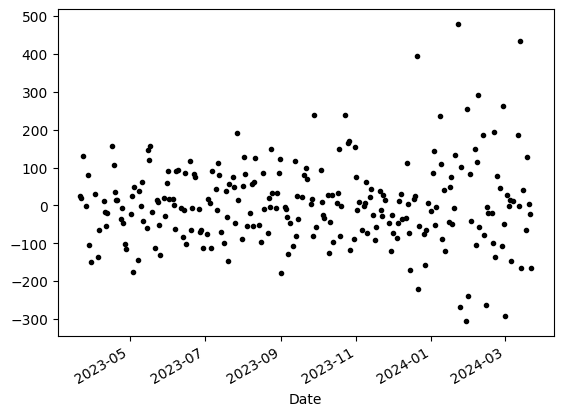

In [38]:
stocks["Return"].plot(style="k.")
plt.show()

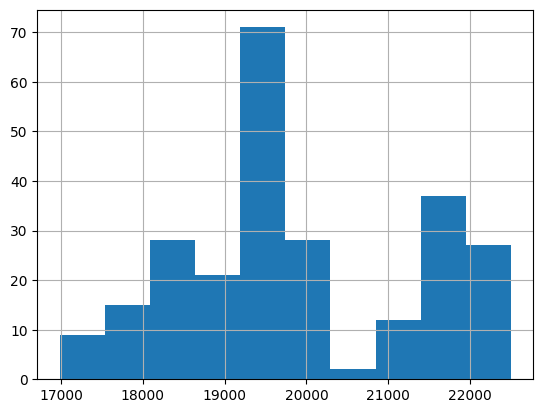

In [41]:
#histogram
stock["Price"].hist()
plt.show()

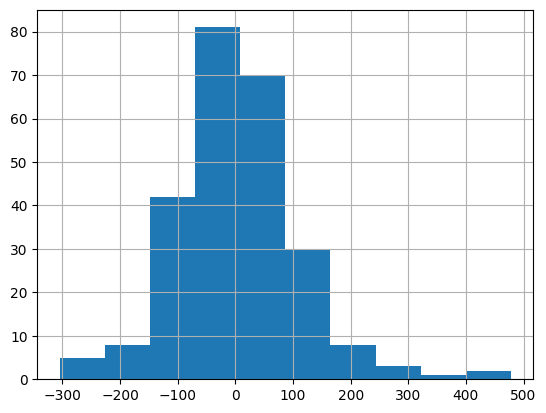

In [42]:
stock["Return"].hist()
plt.show()

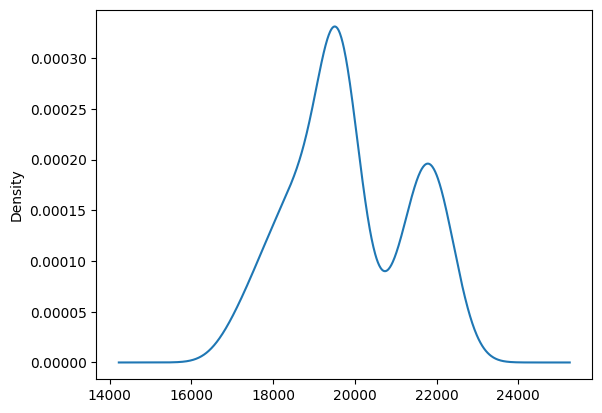

In [45]:
#kernel density Plot
stocks["Price"].plot(kind="kde")
plt.show()

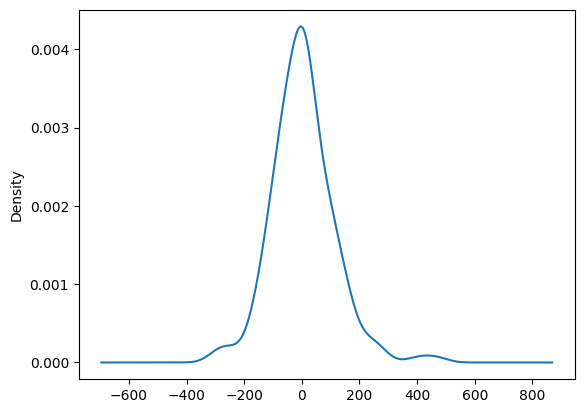

In [46]:
stocks["Return"].plot(kind="kde")
plt.show()

<Axes: xlabel='Date'>

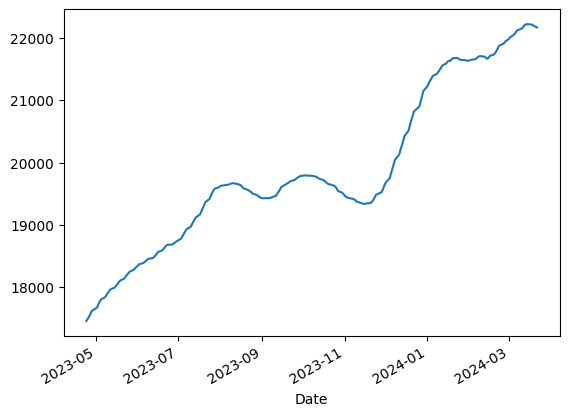

In [53]:
#ploting moving avg(rolling mean of prices)
price_mean = stocks["Price"].rolling(20 , win_type=None).mean()
price_mean.plot()

<Axes: xlabel='Date'>

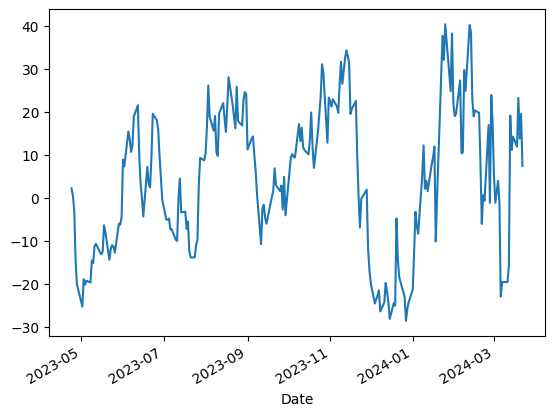

In [55]:
#ploting moving avg(rolling mean of return)
return_mean = stocks["Return"].rolling(20 , win_type=None).mean()
return_mean.plot()

C:\Users\RITIK\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\RITIK\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


<Axes: xlabel='Date'>

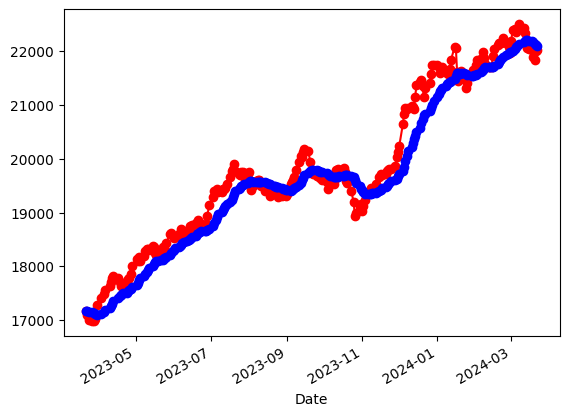

In [64]:
#exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(stocks["Price"]).fit(smoothing_level = .1 , optimized = True)
stocks["Price"].plot(marker='o' , color='red')
model.fittedvalues.plot(marker='o' , color='blue')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

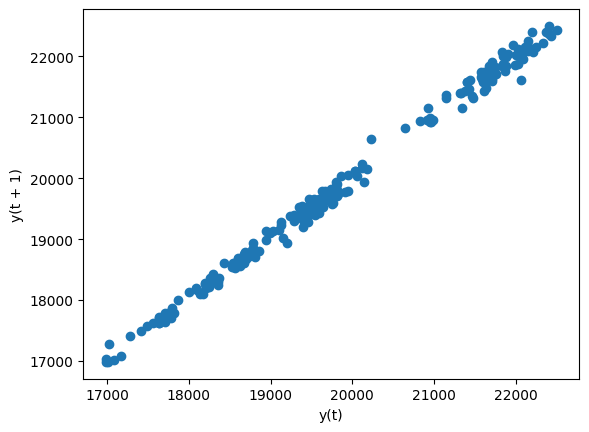

In [68]:
#lag plot - it is used to check if the series is random or not 
#cause if data is random then time series forecasting is not possible
from pandas.plotting import lag_plot
lag_plot(stocks["Price"])

In [70]:
#exibits a linear pattern
# this shows that the data are strongly non-random and further suggests that an autoreggresive
#model might be appropriate

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

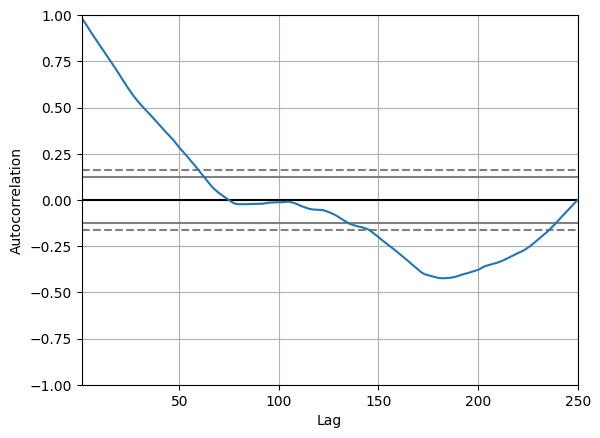

In [71]:
#autocorrelation plot

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(stocks["Price"])

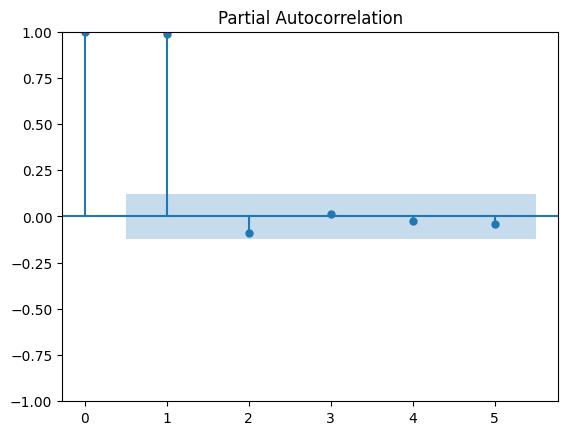

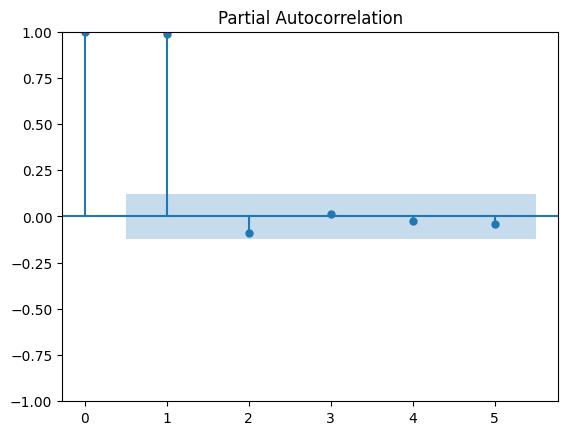

In [72]:
#partial autocrrelation

from pandas import Series
from statsmodels.graphics.tsaplots import plot_pacf

#pacf
plot_pacf(stocks["Price"] , lags=5)